In [271]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  5 09:46:49 2018
@author: Lucas de Moura Rodrigues
@ra: 14.00556-5
"""

'\nCreated on Wed Sep  5 09:46:49 2018\n@author: Lucas de Moura Rodrigues\n@ra: 14.00556-5\n'

In [272]:
import time
import numpy as np
import pandas as pd
from sklearn import linear_model,metrics,svm, preprocessing, ensemble, model_selection,feature_extraction 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
tempo_inicial = time.time()

# Entrada de Dados

In [274]:
# le o csv
print('Le e trata os dados: ', round(time.time() - tempo_inicial, 3))
precos_casa = pd.read_csv("precos_casa_california.csv")

Le e trata os dados:  0.012


# Análise de Dados

In [275]:
#analisa os dados do csv
precos_casa.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [276]:
# ve as informacoes (estatistica) do Dataframe
precos_casa.describe()

,latitude,median_income
count,20445.000000,20444.000000
mean,35.643596,3.876869
std,2.129236,1.904054
min,32.540000,0.499900
25%,33.940000,2.565750
50%,34.260000,3.540300
75%,37.720000,4.756600
max,41.950000,15.000100


In [277]:
# ve as informacoes (estrutura) do Dataframe
precos_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20445 entries, 0 to 20444
Data columns (total 10 columns):
longitude             20445 non-null object
latitude              20445 non-null float64
housing_median_age    20445 non-null object
total_rooms           20445 non-null object
total_bedrooms        20241 non-null object
population            20445 non-null object
households            20445 non-null object
median_income         20444 non-null float64
median_house_value    20445 non-null object
ocean_proximity       20445 non-null object
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [278]:
# trata o dataframe, tirando outliers e espacos em branco
precos_casa = precos_casa.replace(' ', np.nan)
precos_casa = precos_casa.dropna()
colunas = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for i in colunas:
    precos_casa[i] = pd.to_numeric(precos_casa[i])
    precos_casa = precos_casa.loc[precos_casa[i] < precos_casa[i].quantile(0.90)]
precos_casa = precos_casa.reset_index(drop=True)

In [279]:
precos_casa.describe()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000
mean,35.801570,28.084291,1680.148841,345.605807,961.377167,321.913411,3.347447,154299.571443
std,2.236418,10.335483,720.276826,135.152532,395.074728,124.966131,1.243951,64728.652548
min,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,33.930000,19.000000,1183.000000,254.000000,691.000000,237.000000,2.366250,98500.000000
50%,34.680000,30.000000,1650.000000,345.500000,958.000000,326.000000,3.233500,152250.000000
75%,37.780000,36.000000,2161.750000,444.000000,1251.000000,417.000000,4.238600,201200.000000
max,41.950000,45.000000,4293.000000,764.000000,1827.000000,554.000000,6.278100,302100.000000


C:\Users\U001655\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


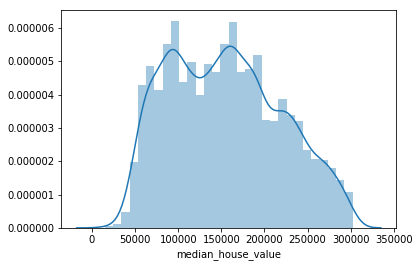

In [280]:
# plota 
sns.distplot(precos_casa['median_house_value'])

# Tratamento de Dados

In [281]:
# separa o dataframe
features = precos_casa.loc[:, precos_casa.columns != 'median_house_value']
target = precos_casa.loc[:, precos_casa.columns == 'median_house_value']

In [282]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,NEAR BAY
1,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,NEAR BAY
2,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,NEAR BAY
3,-122.27,37.82,43.0,1007.0,312.0,558.0,253.0,1.7348,NEAR BAY
4,-122.26,37.82,40.0,624.0,195.0,423.0,160.0,0.9506,NEAR BAY


In [283]:
# numeriza o ocean com colunas
if False:
    ocean_num = pd.get_dummies(features['ocean_proximity'])
    features = pd.concat([features,ocean_num], axis='columns')
    features = features.drop(['ocean_proximity'], axis='columns')
    features.head()
else:
    # numeriza o ocean 
    dic_ocean = {0: 'NEAR BAY', 1: '<1H OCEAN', 2: 'INLAND', 3: 'NEAR OCEAN', 4: 'ISLAND'}
    for chave, valor in dic_ocean.items():
        features = features.replace(valor, chave)

In [284]:
features.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,0
1,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,0
2,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,0


In [285]:
# normaliza dados
colunas = features.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(features.values.astype(float))
features = pd.DataFrame(x_scaled)
features.columns = colunas

#normaliza target
colunas = target.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(target.values.astype(float))
target = pd.DataFrame(x_scaled)
target.columns = colunas

In [286]:
features.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.206932,0.564293,0.886364,0.174551,0.238845,0.221734,0.297101,0.148472,0.0
1,0.206932,0.564293,0.931818,0.381496,0.479003,0.507135,0.659420,0.210031,0.0
2,0.205912,0.564293,0.909091,0.124213,0.158793,0.171240,0.211957,0.329497,0.0


In [287]:
target.head(3)

,median_house_value
0,0.461514
1,0.504356
2,0.322190


In [288]:
# separa o dataframe: treino = 0 - 40%  teste = 40 - 100%
features_treino, features_teste, target_treino, target_teste = model_selection.train_test_split(features, target, test_size=0.4, random_state=101)

In [289]:
features_treino.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6371,0.680938,0.157279,0.340909,0.474948,0.423885,0.659715,0.583333,0.786266,0.50
6959,0.728848,0.027630,0.909091,0.328828,0.339895,0.584523,0.465580,0.321536,0.75
6364,0.674822,0.159405,0.590909,0.133302,0.132546,0.173436,0.182971,0.590288,0.50


In [290]:
features_teste.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5646,0.365953,0.806589,0.409091,0.208576,0.233596,0.148738,0.195652,0.424959,0.50
5447,0.644241,0.125399,0.522727,0.658122,0.715223,0.951153,0.985507,0.960420,0.25
2890,0.668705,0.160468,0.659091,0.275693,0.413386,0.801866,0.543478,0.367779,0.50


In [291]:
target_treino.head()

,median_house_value
6371,0.519333
6959,0.528389
6364,0.597354
5421,0.748869
6834,0.716128


In [292]:
target_teste.head()

,median_house_value
5646,0.259146
5447,0.785093
2890,0.276213
3537,0.347616
3752,0.542670


# Machine Learning

In [293]:
# machine learning
print('Predicao dos Dados: ', round(time.time() - tempo_inicial, 3))
#raul = linear_model.LassoLars(alpha=.1)  # 25480756266.08841
#raul = linear_model.Ridge (alpha = .5) # 25490381018.173256
#raul = svm.SVR() # 6922054605.659882
#raul = linear_model.Lasso()  
raul = ensemble.BaggingRegressor()
#raul = linear_model.SGDRegressor() # infinito
#raul = ensemble.GradientBoostingRegressor()
raul.fit(features_treino.values, target_treino.values.ravel())
predicao = raul.predict(features_teste)

Predicao dos Dados:  1.054


In [294]:
predicao

array([0.3009777 , 0.82213228, 0.36485766, ..., 0.62201455, 0.4685494 ,
       0.508396  ])

In [295]:
# array -> dataframe
predicao = [float(i) for i in predicao]
predicao = pd.DataFrame(data=predicao,columns=['median_house_value']).reset_index(drop=True)
predicao.head()

,median_house_value
0,0.300978
1,0.822132
2,0.364858
3,0.316025
4,0.571823


# Resultado

## RMSE 

In [296]:
np.sqrt(sklearn.metrics.mean_squared_error(target_teste, predicao))

0.1194064740516107

## Teste

In [297]:
print(str(round(raul.score(features_teste, target_teste)*100,3)) + "%")

72.341%


## Treino

In [298]:
print(str(round(raul.score(features_treino, target_treino)*100,3)) + "%")

94.58%


In [299]:
# cria um dataframe para comparar os dados e confirmar se fiz sertu
print('Comparando os Dados: ', round(time.time() - tempo_inicial, 3))
resultado = target_teste.reset_index(drop=True).copy()
resultado['predicao'] = predicao['median_house_value']
resultado = resultado.rename(index=str, columns={'median_house_value': 'Valor Correto', 'predicao': 'Valor_Calculado'})
resultado['Diferenca_Absoluta'] = resultado['Valor Correto'] - resultado['Valor_Calculado']
resultado['Diferenca_Porcentagem'] = (resultado['Valor Correto'] / resultado['Valor_Calculado'] - 1) * 100
resultado['Diferenca_Porcentagem'] = resultado['Diferenca_Porcentagem'].abs()
resultado.head()

Comparando os Dados:  1.42


,Valor Correto,Valor_Calculado,Diferenca_Absoluta,Diferenca_Porcentagem
0,0.259146,0.300978,-0.041832,13.898693
1,0.785093,0.822132,-0.037039,4.505264
2,0.276213,0.364858,-0.088645,24.295711
3,0.347616,0.316025,0.031592,9.996583
4,0.542670,0.571823,-0.029154,5.098343


In [300]:
# salva o resultado em um excel
excel = pd.ExcelWriter(F"Resultado.xlsx")
precos_casa.to_excel(excel, sheet_name='Precos_Casa_Tratado')
resultado.to_excel(excel, sheet_name='Comparacao')
excel.save()

In [301]:
print('Tempo do Programa: ', round(time.time() - tempo_inicial, 3))

Tempo do Programa:  3.144
